<a href="https://colab.research.google.com/github/Eugene31415/Pet-Projects/blob/main/phase_vocoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io.wavfile import read, write
from scipy.fft import fft, fftfreq
from math import sqrt

In [ ]:
def getFrames(x, hop, winSize):
    
    numframes = (len(x) - winSize) // hop
    
    Frames = np.zeros((numframes, winSize))
    
    for i in range(numframes): Frames[i] = x[i * hop : i * hop + winSize]
        
    return Frames

In [ ]:
def addFrames(Frames, hop):
    
    res = np.zeros(Frames.shape[0] * hop - hop + Frames.shape[1])
    
    tmp = 0
    for i in range(Frames.shape[0]):
        res[tmp:tmp + Frames.shape[1]] += Frames[i]
        tmp += hop
        
    return res

In [ ]:
def PitchShift(audio, winsize, hop, alpha):
    
    # Create Hanning window + sampling
    wn = np.hanning(winsize * 2 + 1)[1:-1:2]
    
    # Final shift
    hopOut = int(alpha * hop)
    
    x = np.concatenate([np.zeros(hop * 3), audio]) # хз зачем тут этот коэф 3
    # === INITIALIZATION ===
    
    y = getFrames(x, hop, winsize)
    numFrames = y.shape[0]
    
    newFrames = np.zeros((numFrames, winsize))
    
    phase = 0
    prev = 0

    for index in range(numFrames):
        
        # === (1) === 
        
        currFrameWindowed = y[index] * wn / sqrt(winsize / hop / 2)
        
        CurrFrameWindowedFFT = np.fft.fft(currFrameWindowed)
        
        magFrame = abs(CurrFrameWindowedFFT)
        phaseFrame = np.angle(CurrFrameWindowedFFT)
        
        # === (2) ===
        
        # Phase difference
        delta = phaseFrame - prev
        
        newdelta = delta - hop * 2 * np.pi * np.arange(winsize) / winsize
        
        newdeltacut = (newdelta + np.pi) % (2 * np.pi) - np.pi
        
        # True freq
        trueFreq = 2 * np.pi * np.arange(winsize) / winsize + newdeltacut / hop
        
        # Final phase 
        phase += hopOut * trueFreq
        
        # === (3) ===
        
        # res Frame
        resFrame = np.fft.ifft(magFrame * np.exp(1j * phase)).real
        
        newFrames[index] = resFrame * wn / sqrt(winsize / hopOut / 2)
        
    res = addFrames(newFrames, hopOut)
    
    return res

In [ ]:
# Читаем файл
samplerate, data = wavfile.read('C:/Users/Xiaomi/Downloads/test_mono.wav')

In [ ]:
xx = data.shape[0]

winsize = int(xx*0.01)
hop = int(xx*0.001)

res2 = PitchShift(data,winsize, hop, 5)

res2 = res2.astype('int16')

write("test_mono_r05.wav", samplerate,  res2) # Растянутое в 2 раза

samplerate, audio = read(input_path)


In [ ]:
# Сжимаем в 2 раза
xx = data.shape[0]

winsize = int(xx*0.01)
hop = int(xx*0.001)

res2 = PitchShift(data, winsize, hop, 0.5) # Подобрать размер окон и сдвига! 

res2 = res2.astype('int16')

write("test_mono_r05.wav", samplerate,  res2) # Растянутое в 2 раза

In [ ]:
# Растягиваем в 2 раза
xx = data.shape[0]

winsize = int(xx*0.01)
hop = int(xx*0.001)

res = PitchShift(data, winsize, hop, 2)

res *= (max(data) / max(res))
res = np.ceil(res).astype('int16')

write("test_mono_r2.wav", samplerate,  res ) # Растянутое в 2 раза

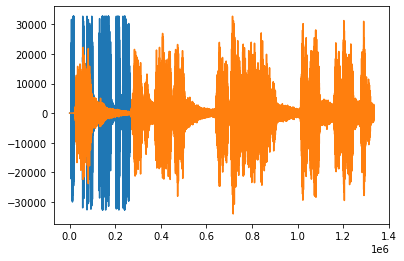

In [ ]:
plt.plot(data)
plt.plot(res2 * (max(data) / max(res2)))